In [6]:
# Welcome user and begin with first question #
from key import trip_api_key
from secondKey import weather_api_key
import requests
import seaborn as sb
import pandas as pd 

#read all csv files and make the travel destinations be the index
states = pd.read_csv("state_travel.csv")
international = pd.read_csv("international_travel.csv")

# First we'll introduce the project to the user and ask the first questions to start looking at which category of locations we should ask about
print('Welcome to your Travel Suggestion for 2025! We will match you to a travel destination based on your answers in a few rounds of questions and traveling data results.')

# We will use an error handling to ensure answer is either 'local' or 'international
intro_answers = ['international', 'local']

while True:
    try:
        location = input(f"First up, would you like to find a travel location internationally or within the U.S.? Please enter 'international' or 'local' for travel locations within the U.S.")
        if location not in intro_answers:
            raise Exception
        break
    except Exception:
        print(f"You entered: {location} \nPlease enter either 'international' or 'local' for your response, thank you!")

Welcome to your Travel Suggestion for 2025! We will match you to a travel destination based on your answers in a few rounds of questions and traveling data results.


You selected to find a travel destination internationally! Here is a look at the top 10 most traveled countries around the world:


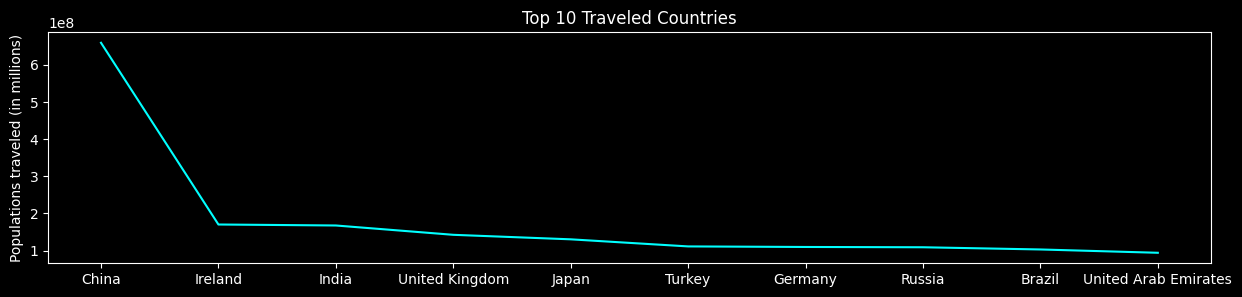

In [7]:
# Organize and find top 10 for INTERNATIONAL destinations and LOCAL/U.S. STATE destinations #

# International dataset contains data from 1970-2020 for each country, NaN values, and other components as well. The use of filtering, conditions, and dropping missing values will be needed to help find the 10 countries with the largest amounts of traveling in a year and not including the U.S.
travel_year = international[international['Year'] == 2019] 
countries_only = travel_year[travel_year['Code'].str.len() <= 3].dropna()
international_only = countries_only[countries_only['Code'] != 'USA']
highest_international = international_only.nlargest(10, "Air transport, passengers carried")
highest_international

# State dataset contains only values from 2022 so no filtering by year will be needed. However the dataset does contain multiple categories for each state so we will need to filter in order to only obtain the 'Passenger' values
states_passengers = states[states['Category'] == 'Passengers'].dropna()
states_passengers['2022'] = states_passengers['2022'].str.replace(",", "").round().astype(int)  # in order for the data to be read as integers we will need to remove the commas, round, and change the data type as int
states_highest = states_passengers.nlargest(10, '2022')
states_highest

# Create visual graphs to show top 10 travel destinations based on what the user selected #
import matplotlib.pyplot as plt

if (location == 'local'):
    print('You selected to find a travel destination within the U.S.! Here is a look at the top 10 most traveled states within the U.S.:')
    
    plt.figure(figsize=(14, 3))
    plt.plot(states_highest['State'], states_highest['2022'], color = 'red')
    plt.title('Top 10 Traveled States')
    plt.ylabel('Populations traveled (in millions)')
    plt.style.use('dark_background')
    plt.show
    
else: 
    print('You selected to find a travel destination internationally! Here is a look at the top 10 most traveled countries around the world:')
    
    plt.figure(figsize=(15, 3))
    plt.plot(highest_international['Entity'], highest_international['Air transport, passengers carried'], color = 'cyan')
    plt.title('Top 10 Traveled Countries')
    plt.ylabel('Populations traveled (in millions)')
    plt.style.use('dark_background')
    plt.show

In [8]:
# Ask 3 Questions to begin eliminating non-matches from their top 10 locations #

# Question 1: (Error handling to ensure answer for first question is either 'sunny', 'season', or 'wintry')
seasons_answers = ['seasonal', 'sunny', 'wintry']

while True:
    try: 
        seasons = input("Would you describe your ideal travel days as 'sunny', 'wintry', or 'seasonal'?")
        if seasons not in seasons_answers:
            raise Exception
        break
    except Exception:
        print("Please enter either 'sunny', 'wintry', or 'seasonal' for your response. Thank you!")


# Question 2: (Error handling to ensure answer for second question is either 'historical' or 'attractions')
places_answers = ['historical', 'attractions']

while True:
    try:
        places = input("Does your ideal travel destination include more 'historical' sites and landmarks or 'attractions' and vacational places?") 
        if places not in places_answers:
            raise Exception
        break
    except Exception:
        print("Please enter either 'historical' or 'attractions' for your response. Thank you!")
        
# Question 3: (Error handling to ensure answer for third question is only an integer number and it's within the range of the potential destinations)
if location == 'local':
    while True:
        try:
            expected_cost = int(input("What is your expected expenses (per person) for a week of vacation in USD? (Note: Costs on average are at least $1200+)"))
            if expected_cost < 1200:
                raise Exception
            break
        except ValueError:
            print("Please enter your expected expenses in an integer format.")
        except Exception:
            print("Please enter a higher number in order to get a more accurate travel suggestion, thank you!")
else:
    while True:
        try:
            expected_cost = int(input("What is your expected expenses (per person) for a week of vacation in USD? (Note: Costs on average are from $450 to $2,100+)"))
            if expected_cost < 450:
                raise Exception
            break
        except ValueError:
            print("Please enter your expected expenses in an integer format.")
        except Exception:
            print("Please enter a higher number in order to get a more accurate travel suggestion, thank you!")


In [9]:
# Use of dictionaries and lists and functions to find the first round of suggested countries or states based on matching responses #
responses = [seasons, places]
matches = []

# International countries as keys and their categories as values:
international_match = {
    'China' : ['seasonal', 'historical'],
    'Ireland' : ['wintry', 'historical'],
    'India' : ['sunny', 'historical'],
    'United Kingdom' : ['seasonal', 'historical'],
    'Japan' : ['seasonal', 'attractions'],
    'Turkiye' : ['sunny', 'historical'],
    'Germany' : ['wintry', 'historical'],
    'Russia' : ['wintry', 'historical'],
    'Brazil' : ['sunny', 'attractions'],
    'United Arab Emirates' : ['sunny', 'attractions']
}

# Local State as keys and their categories as values:
local_match = {
    'Georgia' : ['seasonal', 'historical'],
    'Illinois' : ['wintry', 'historical'],
    'New York' : ['seasonal', 'historical'],
    'Washington' : ['seasonal', 'historical'],
    'Florida' : ['sunny', 'attractions'],
    'California' : ['sunny', 'attractions'],
    'Texas' : ['sunny', 'historical'],
    'Nevada' : ['sunny', 'attractions'],
    'North Carolina' : ['seasonal', 'historical'],
    'Colorado' : ['wintry', 'attractions']
}

# average costs for a week in each location:
all_costs = {
    'Georgia' : 1500, 'Illinois' : 1850, 'New York' : 2250, 'Washington' : 1750, 'Florida' : 1750, 'California' : 2150, 'Texas' : 1500, 'Nevada' : 1500, 'North Carolina' : 1450, 'Colorado' : 1750,
    'China': 660, 'Ireland': 1400, 'India': 425, 'United Kingdgom': 2000, 'Japan': 1800, 'Turkiye': 1050, 'Germany': 1500, 'Russia': 1250, 'Brazil': 950, 'United Arab Emirates': 2150
}

In [10]:
# class method is used to return and call the matches in rounds to create a first round result  
class Match:
    def __init__(self, matches):
        self.matches = matches
        
    def first_round(self):
        if location == 'local':
            for x, y in local_match.items():
                 if responses == y:
                    matches.append(x)         
            return matches
        else:
            for x, y in international_match.items():
                if responses == y:
                    matches.append(x)
            return matches

results = Match(responses)    
new_results = results.first_round() # store results of all first round matches into new_results to use later

In [11]:
# Inheriting from class Match to further elminate options if the initial round found more than one match/suggestion for the user
cost_match = {}

# call from class Match and use results to iterate through all_costs dictionary and find the relatice costs then find the closest value based on entered expense_cost 
class CostMatch(Match):
    def __init__(self, matches, expected_cost, all_costs): 
        super().__init__(matches) 
        self.expected_cost = expected_cost # add expected_cost to include user input from third question for matching
        self.all_costs = all_costs # add all_costs to iterate and match results
        
    def second_round(self):
        closest_match = None
        for x in self.matches:
            if x in self.all_costs:
                cost_match[x] = self.all_costs[x] # update empty cost_match dictionary to contain values from all_costs if they contain the same keys from the matches list
                closest_match = min(cost_match, key=lambda x: abs(cost_match[x] - self.expected_cost)) # update value for closest_match using the min() function containing an iteration over the updated cost_match and using lambda with the absolute value of the cost_match key - expected cost as a key in order to find the smallest difference to find the closest match  
        return closest_match
    
# Creating an object to store results from the second round
second_results = CostMatch(new_results, expected_cost, all_costs)
final_result = second_results.second_round() #store final result containing either the state or country name into 'final_result' variable

In [12]:
# Dictionary containing popular destinations to be matched with final results and called in classes for extra details in matched destinations
travel_destinations = { 
"Florida": "Miami", "California" : "Los Angeles & San Francisco", "Texas" : "Austin", "Georgia" : "Atlanta", "New York" : "New York City", "Illinois" :"Chicago", "Colorado" : "Denver", "North Carolina" : "Charlotte", "Nevada" : "Las Vegas", "Washington" : "Seattle", # LOCAL
"China" : "Beijing", "Ireland": "Dublin", "India" : "Agra", "United Kingdom" : "London", "Japan" : "Tokyo", "Turkiye" : "Istanbul", "Germany" : "Berlin", "Russia" : "Moscow", "Brazil" : "Rio de Janeiro", "United Arab Emirates" : "Dubai" # INTERNATIONAL
}

# create a class using final result, all_costs, and travel_destinations in order to get the matching destination and initial average costs for final message
class Details: # Encapsulation is used for efficiency in finding both destination and the average cost in one class
    def __init__(self, final_result, travel_destinations):
        self.final_result = final_result
        self.travel_destinations = travel_destinations
        
    def get_destination(self, travel_destinations):
        for x in travel_destinations:
            if self.final_result == x:
                return travel_destinations[x]
    
    def get_cost(self, all_costs):
        for x in all_costs:
            if self.final_result == x:
                return all_costs[x]

final = Details(final_result, travel_destinations)
destination = final.get_destination(travel_destinations) #matching destination is stored in'destination' variable
costs = final.get_cost(all_costs) #matching cost is stored in 'costs' variable
#final_result


In [13]:
# Create a class that will be used for all API handling and potential error catching
class API_handling:
    def __init__(self, url):
        self.url = url
    
    def error_handling(self):
        try: 
            response = requests.get(self.url)
            # check if status code shows success and if not print out error message with the status code we would need to fix
            if response.status_code == 200:
                trip_location = response.json()
                return trip_location
            else:
                print(f"Request failed with status code: {response.status_code}")
        except Exception as e:
            print(f"Need to fix error: {e}")
            
# use of polymorphism for multiple url links and their API_handling           
def api(url):
    return url.error_handling()


# updated the final_result to exact_location to ensure no errors in lookups
def updated_location(final_result): 
    if location == "international": # international locations need the cities/capitals to find accurate coordinates
        return travel_destinations[final_result]
    if final_result == "North Carolina": #create if statement because North Carolina doesn't apply in OpenWeatherAPI's geocoding search
        return travel_destinations[final_result]
    else:
        return final_result
    
exact_location = updated_location(final_result)     

In [14]:
# OpenWeather API will be used for the current weather in {final_result} and the data visualization of {final_result}'s 5-day weather forecast #
    
coordinates_url = f"http://api.openweathermap.org/geo/1.0/direct?q={exact_location}&limit=1&appid={weather_api_key}"
c = API_handling(coordinates_url)
coordinates = api(c)[0] #(results are shown as a list containing a dictionary and class type for coordinates == <class 'list'> so I proceeded with using index[0] which changed the type to <class 'dict'> so I could access the key:value pairs after) 

# then we will need to find the latitude and longtitude coordinations from results and store them into variables that will be used for locating the coordinates of {final_result}:
lat = coordinates["lat"]
lon = coordinates["lon"]

In [15]:
# OpenWeather API use #1: Current weather in farenheit
current_url = f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}&units=imperial"

w = API_handling(current_url)
current_weather = api(w)['main']['temp'] #store value in current_weather

In [16]:
# OpenWeather API use #2: 5-day Weather forecast
forecast_url = f"https://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={weather_api_key}&units=imperial"

# run link through API_handling 
f = API_handling(forecast_url)
forecast = api(f)

In [17]:
# OpenWeather API cont. (Iterations) Created to select the specific data that will be used in 5-day forecast data visualization 
temperatures = []

for i in forecast["list"]:
    temp = i["main"]["temp"]
    temperatures.append(temp)

#len(temperatures)/5 #dataset is 5-day reports with 3-hour intervals meaning there are 8 forecast temperatures reported per day. To use this for our data visualization, we wil need to group every 8th temperatures value and create a new list 
days = [temperatures[i:i+8] for i in range(0, len(temperatures), 8)] #for i in range(beginning with 0, ending with 40, and skipping every 8th value) will create a total of 5 indicies for the new list each containing a new list of values that iterates beginning with temperature[#] and ending with temperature[#+8]
avg_day = [sum(avg)/len(avg) for avg in days] #to fully group values we will sum(avg) which represents each list, and divide it by the length of avg which is 8. This will create a single averaged value for each of the 5 lists in "day"

# create a df using avg_day and a list of the 5 days to use for plotting
df = pd.DataFrame({"Temperatures °F" : avg_day, f"5-Day Weather Forecast for: {final_result}" : [1, 2, 3, 4, 5]})

In [18]:
# Result Message: will be used for both INTERNATIONAL and LOCAL locations. Will give a overview of their matched final location and its most popular travel destination #
class Travel:
    def __init__(self, location, destination, seasons, places, costs, weather):
        self.location = location
        self.destination = destination
        self.seasons = seasons
        self.places = places
        self.costs = costs
        self.weather = weather
        
    def final_location(self):
        return print(f"Based on your answers, your travel match is: {self.location}!")
    
    def answers_detailed(self):
        print(f"\n{self.location} is well known for sightful locations and their {self.seasons} state activities. Their most popular travel destination is located in {self.destination} and it is currently {self.weather}°F. The average traveling cost is approximately around ${self.costs} per week. \n\nBelow you'll see a little more of what this incredible destination place has to offer!")

In [19]:
# Result Message (Instances): created for ALL final results/locations #
final_details = Travel(final_result, destination, seasons, places, costs, current_weather)
final_details.final_location()
final_details.answers_detailed() 

Based on your answers, your travel match is: Brazil!

Brazil is well known for sightful locations and their sunny state activities. Their most popular travel destination is located in Rio de Janeiro and it is currently 75.06°F. The average traveling cost is approximately around $950 per week. 

Below you'll see a little more of what this incredible destination place has to offer!


In [20]:
# TripAdvisor APIs will be used to match the users to different travel locations based on their results and provide details and links to each #
location_url = f"https://api.content.tripadvisor.com/api/v1/location/search?key={trip_api_key}&searchQuery={exact_location}&language=en"

# TripAdvisor API use #1: Location Search to find location suggestions along with the exact ids for each
trip_location = API_handling(location_url)
all_id = api(trip_location)

In [21]:
# Isolate all of TripAdvisor's location_ids and place into a list to use for location details (results from TripAvisor contain potential location IDs outside of {final_result} if another location contains {final_result} within the name of their cities or destinations. Since their IDs will also be shown in the suggestions, to prevent any issues/confusion in results, we will need to filter the data to ensure the IDs used only contain {final_results} in their states)
class Data_retrieval:           # Create a class to retrieve specific data from all_id
    def __init__(self, location, id):
        self.id = id
        self.location = location
        place = None
    
    def retrieval(self):
        if self.location == "local":
            place = "state"
            location_ids = [ 
                item[self.id]
                for item in all_id['data']
                if 'address_obj' in item and item['address_obj'].get(place) == f"{final_result}"
            ]
            return location_ids
        else:
            place = "country"
            location_ids = [ 
                item[self.id]
                for item in all_id['data']
                if 'address_obj' in item and item['address_obj'].get(place) == f"{final_result}"
            ]
            return location_ids
        
def retrieve(r):
    return r.retrieval()

In [22]:
# TripAdvisor API use #1: retrieve "names" of places to visit from location
p = Data_retrieval(location, "name")
places = retrieve(p)

In [23]:
# TripAdvisor API use #2: retrieve "details" of each place using location_id values      
d = Data_retrieval(location, "location_id")
data = retrieve(d)

In [24]:
# TripAdvisor API use #3: LocationIDs will search for descriptions and links for suggested places to visit 

class Process_data:  # this class will help select the description values and web_url values that match the location_ids only if they're mentioned
        def __init__(self, location_ids, description):
                self.location_ids = location_ids
                self.description = description
        
        def process(self):
                new_details = []
                for i in self.location_ids:
                        details_url = f"https://api.content.tripadvisor.com/api/v1/location/{i}/details?key={trip_api_key}&language=en&currency=USD"
                        a = API_handling(details_url)
                        details = api(a) 
                        for x in details:
                                if self.description == x:
                                        new_details.append(details[x])
                return new_details

In [25]:
# Trip Advisor cont. (Instances) to store results for both description and web
d = Process_data(data,description="description")
description = d.process()

w = Process_data(data, description="web_url")
web = w.process()

Congratulations on your Travel 2025 suggestion to Brazil! Here are a few things you can on your visit:

* Rio de Janeiro! With its plentiful beaches, dramatic mountains, and backdrop of samba and bossa nova rhythms, it's easy to fall in love with Rio de Janeiro. Made famous in song, Ipanema Beach is still the place to stroll, sunbathe, and be seen. The largest Art Deco statue in the world, Christ the Redeemer, beckons visitors to Corcovado Mountain. Rio’s annual Carnaval celebrations are bacchanalian extravaganzas of feasting, music, dance, and costumed revelry. Link: https://www.tripadvisor.com/Tourism-g303506-Rio_de_Janeiro_State_of_Rio_de_Janeiro-Vacations.html?m=66827 *

* Fairmont Rio de Janeiro Copacabana! Located in one of the most sought after neighborhoods in Rio de Janeiro, the Fairmont Rio de Janeiro Copacabana awaits you for extraordinary and memorable days in the capital of Rio de Janeiro. With all the amenities you need at your fingertips, the hotel has wellness services 

<Axes: xlabel='5-Day Weather Forecast for: Brazil', ylabel='Temperatures °F'>

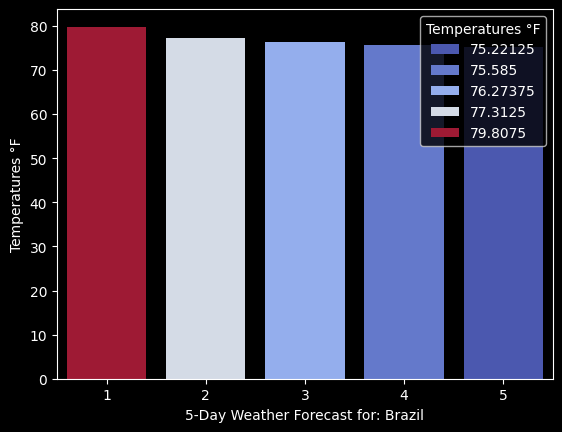

In [26]:
# Final Results #
print(f"Congratulations on your Travel 2025 suggestion to {final_result}! Here are a few things you can on your visit:\n")

#create iterations to display description and web_url findings
for i in range(len(description)):  
    print(f"* {places[i]}! {description[i]} Link: {web[i]} *\n")

# Data Visualization for 5-day forecast to provide an overview of the weather in {final_results} and a potential comparison of the temperatures now versus their preference
print(f"\nDon't want to wait to travel? Here is a current 5-day forecast as of {final_result}'s weather:")
sb.barplot(x=f"5-Day Weather Forecast for: {final_result}",
    y="Temperatures °F", 
    hue="Temperatures °F", #set hue to equal to same value as y in order to add a palette that will make the highest number (for temperature) a different color such as red to show the warmest vs coldest temperatures
    data=df,
    palette="coolwarm")

In [27]:
# Final Message #
print(f"\nHope you find {final_result} to be a perfect travel match! Thank you for participating and happy traveling!")


Hope you find Brazil to be a perfect travel match! Thank you for participating and happy traveling!
